In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
train = pd.read_csv('./data/train-test/train.csv')
test = pd.read_csv('./data/train-test/test.csv')

In [3]:
X_train = train.drop('is_canceled', axis=1)
y_train = train['is_canceled']

X_test = test.drop('is_canceled', axis=1)
y_test = test['is_canceled']

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=14)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=14)

In [17]:
y_pred = rf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8840033975084938


In [7]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     22220
           1       0.85      0.84      0.84     13100

    accuracy                           0.88     35320
   macro avg       0.88      0.88      0.88     35320
weighted avg       0.88      0.88      0.88     35320



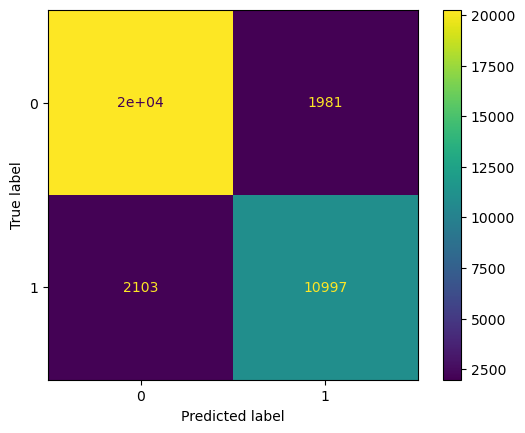

In [8]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

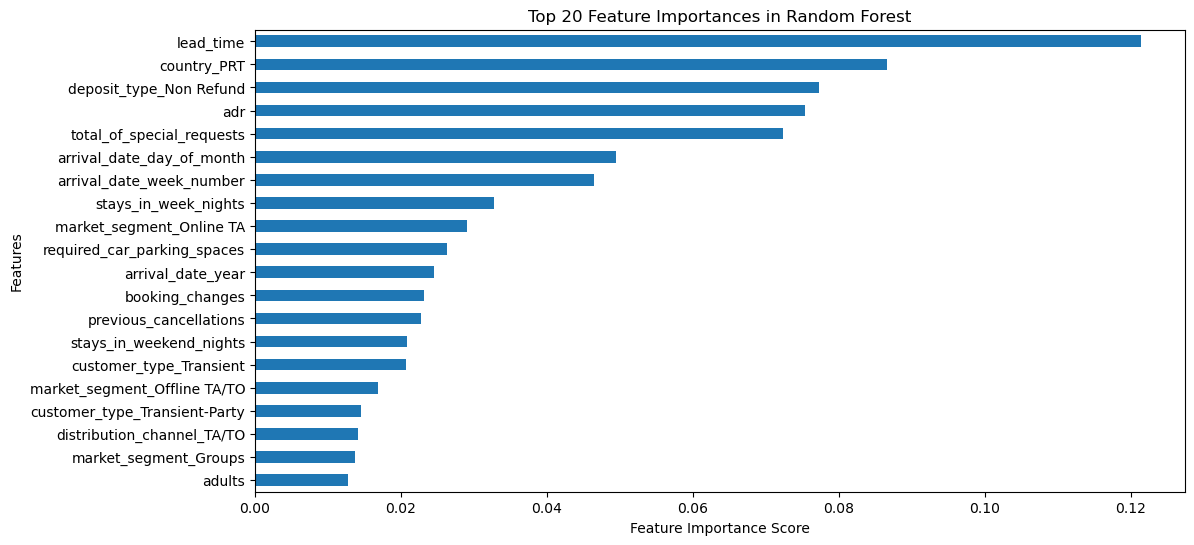

In [9]:
# Sort feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot top 20 features
feature_importances[:20].plot(kind='barh')

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [20]:
from sklearn.inspection import PartialDependenceDisplay

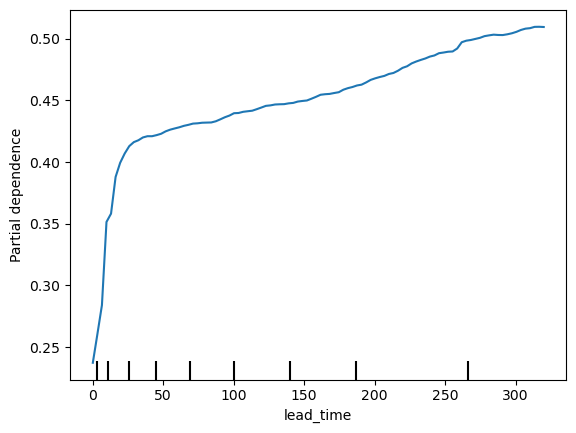

In [27]:
PartialDependenceDisplay.from_estimator(rf, X_test, ['lead_time'])

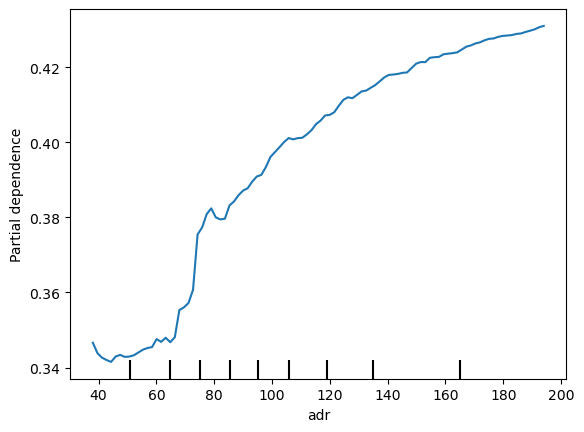

In [31]:
PartialDependenceDisplay.from_estimator(rf, X_test, ['adr'])

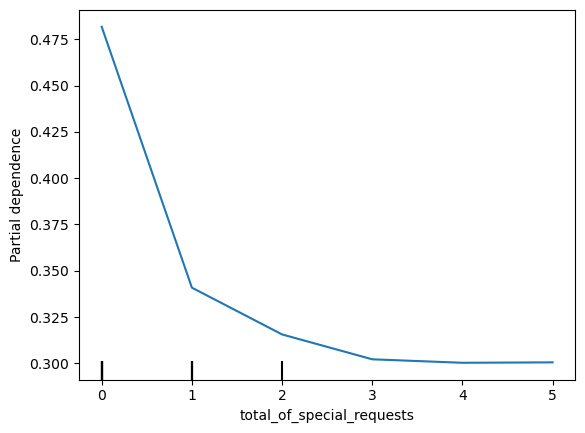

In [32]:
PartialDependenceDisplay.from_estimator(rf, X_test, ['total_of_special_requests'])

In [37]:
X_sample = X_test[X_test['hotel_Resort Hotel'] == False]

In [38]:
X_sample.shape

(23842, 86)

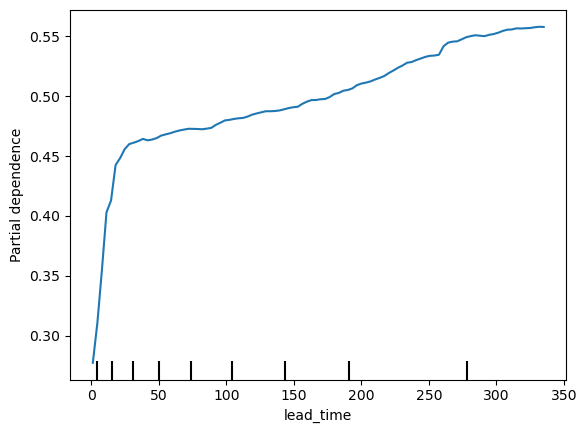

In [39]:
PartialDependenceDisplay.from_estimator(rf, X_sample, ['lead_time'])

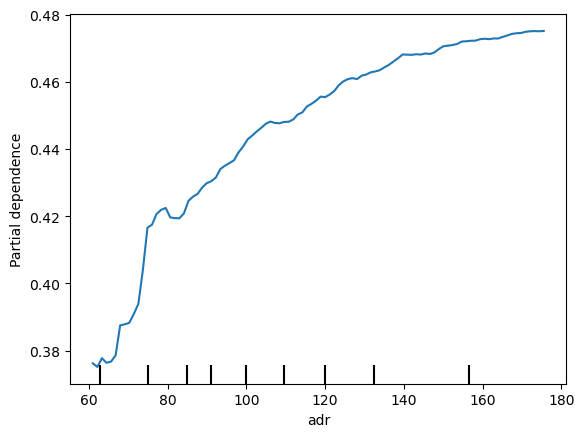

In [40]:
PartialDependenceDisplay.from_estimator(rf, X_sample, ['adr'])

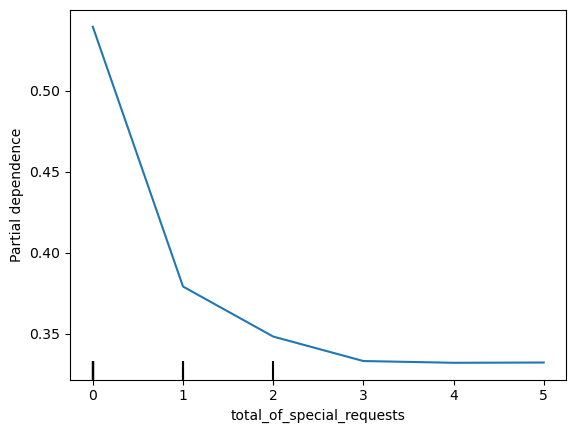

In [41]:
PartialDependenceDisplay.from_estimator(rf, X_sample, ['total_of_special_requests'])

## XGBoost

In [ ]:
import xgboost as xgb

# instantiate the classifier 
xgb_clf = xgb.XGBClassifier(seed=13, n_estimators=500)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

In [ ]:
y_pred_xg = xgb_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xg)
print(accuracy)

0.8774631936579842


In [ ]:
class_report = classification_report(y_test, y_pred_xg)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     22220
           1       0.83      0.84      0.84     13100

    accuracy                           0.88     35320
   macro avg       0.87      0.87      0.87     35320
weighted avg       0.88      0.88      0.88     35320



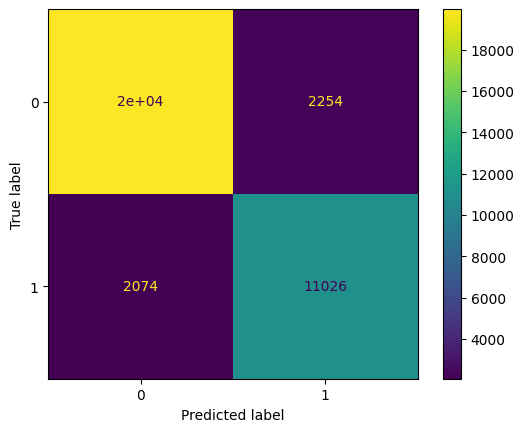

In [ ]:
cm = confusion_matrix(y_test, y_pred_xg)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

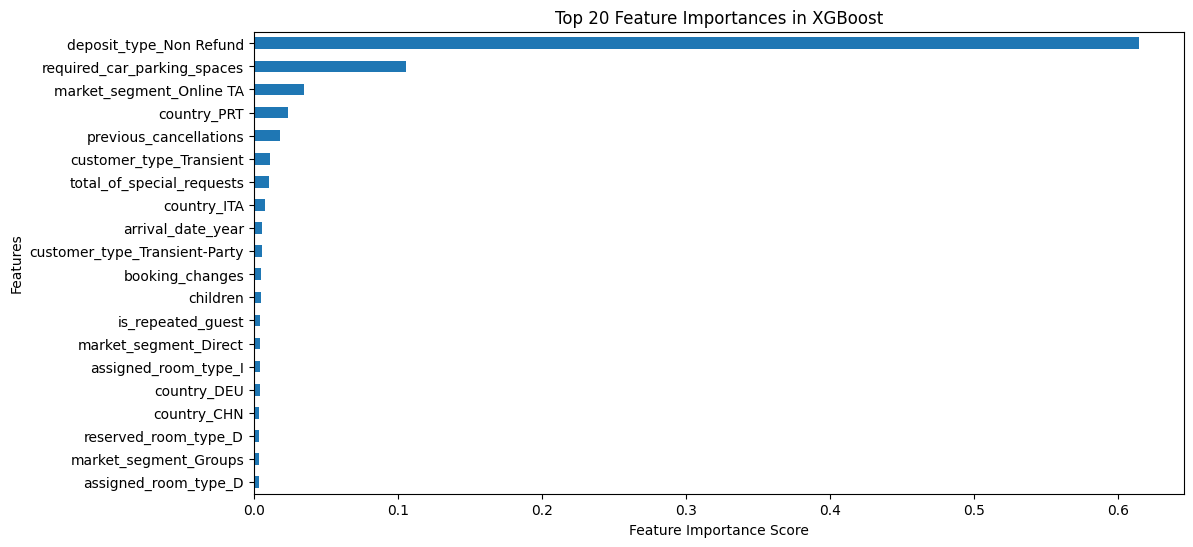

In [ ]:
# Sort feature importances
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot top 20 features
feature_importances[:20].plot(kind='barh')

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances in XGBoost")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(60), random_state=14)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=60, random_state=14)

In [ ]:
y_pred_mlp = mlp.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_mlp)
print(accuracy)

0.8410532276330691


In [ ]:
class_report = classification_report(y_test, y_pred_mlp)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     22220
           1       0.79      0.78      0.78     13100

    accuracy                           0.84     35320
   macro avg       0.83      0.83      0.83     35320
weighted avg       0.84      0.84      0.84     35320



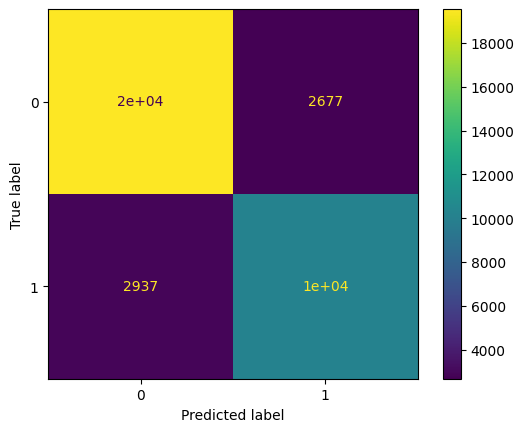

In [ ]:
cm = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=200, random_state=13)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=13)

In [12]:
y_pred_log = log_reg.predict(X_test_scaled)

In [15]:
coefficients = log_reg.coef_[0]  # Use [0] if it's binary classification

# Intercept
intercept = log_reg.intercept_[0]


feature_names = X_train.columns  # if X is a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
pd.set_option('display.max_rows', 100)
print(coef_df)

                           Feature  Coefficient
0                        lead_time     0.667030
1                arrival_date_year     0.192711
2         arrival_date_week_number     0.065498
3        arrival_date_day_of_month    -0.010217
4          stays_in_weekend_nights     0.025753
5             stays_in_week_nights     0.110509
6                           adults     0.027939
7                         children     0.103843
8                           babies    -0.005183
9                is_repeated_guest    -0.201355
10          previous_cancellations     1.825622
11  previous_bookings_not_canceled    -0.318637
12                 booking_changes    -0.290566
13            days_in_waiting_list    -0.073022
14                             adr     0.346977
15     required_car_parking_spaces    -1.901481
16       total_of_special_requests    -0.744962
17                     country_BEL     0.020187
18                     country_BRA     0.140269
19                     country_CHE     0

In [23]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

Accuracy: 0.8125141562853907


In [24]:
class_report = classification_report(y_test, y_pred_log)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     22220
           1       0.73      0.77      0.75     13100

    accuracy                           0.81     35320
   macro avg       0.80      0.80      0.80     35320
weighted avg       0.82      0.81      0.81     35320



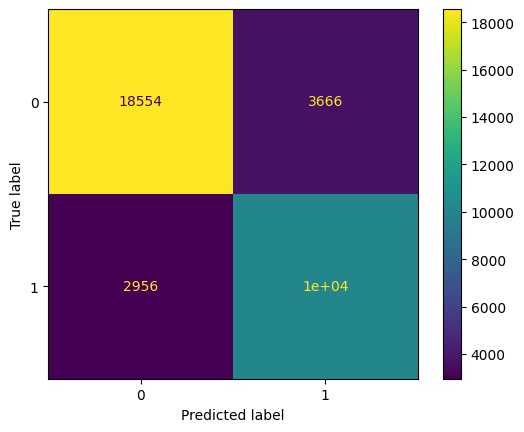

In [25]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Export Models

In [26]:
import joblib 

joblib.dump(rf, 'models/RandomForest.joblib')
joblib.dump(xgb_clf, 'models/XGBoost.joblib')
joblib.dump(mlp, 'models/MLP.joblib')
joblib.dump(log_reg, 'models/Logistic.joblib')

['models/Logistic.joblib']